## Feature Selection
## Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd


In [2]:
clean_df = pd.read_csv('Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv')

##Hint: use the file Create Data_Marketing_Customer_Analysis_Round3.csv

### One Hot/Label Encoding of the categorical variables in the categoricals data frame that ### you created in Activity 4. ( Hint: check Dropfirst option).
### for the first iteration, we will focus on the numericals data (numericals data frame) as ##our data source.
### remove the outliers from the numerical columns.
### check if there are highly correlated features and drop them if there are any.
### X-y split (y is the target variable which is the total claim amount)

In [10]:
type(clean_df)
as_dataframe()


NoneType

In [8]:

# Delete date column
clean_df.drop(['Unnamed: 0'], axis =1, inplace = True)



AttributeError: 'NoneType' object has no attribute 'drop'

In [4]:
#numerical = clean_df.select_dtypes('int64') # asign numerics to new object
#categoricals = clean_df.select_dtypes('object')

## Hot coding of categorical  vars

In [6]:
categoricals.columns

Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [85]:
# Delete date column
clean_df =clean_df.drop('effective_to_date',1)

# Dont use in place here df.drop('a', axis=1, inplace=True) 

/var/folders/np/_4nsf5195pl0jfyhg25kr9q80000gn/T/ipykernel_78610/2985168682.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  clean_df =clean_df.drop('effective_to_date',1)


KeyError: "['effective_to_date'] not found in axis"

In [62]:
#Table of features
categoricals_features= categoricals.select_dtypes("object")
categoricals_features


,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [63]:
#cat_dic_cols =OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)

/opt/anaconda3/envs/DA/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [64]:
cat_dic_cols

array(['region_east', 'region_north west', 'region_west region',
       'response_yes', 'coverage_extended', 'coverage_premium',
       'education_college', 'education_doctor',
       'education_high school or below', 'education_master',
       'effective_to_date_1/10/11', 'effective_to_date_1/11/11',
       'effective_to_date_1/12/11', 'effective_to_date_1/13/11',
       'effective_to_date_1/14/11', 'effective_to_date_1/15/11',
       'effective_to_date_1/16/11', 'effective_to_date_1/17/11',
       'effective_to_date_1/18/11', 'effective_to_date_1/19/11',
       'effective_to_date_1/2/11', 'effective_to_date_1/20/11',
       'effective_to_date_1/21/11', 'effective_to_date_1/22/11',
       'effective_to_date_1/23/11', 'effective_to_date_1/24/11',
       'effective_to_date_1/25/11', 'effective_to_date_1/26/11',
       'effective_to_date_1/27/11', 'effective_to_date_1/28/11',
       'effective_to_date_1/29/11', 'effective_to_date_1/3/11',
       'effective_to_date_1/30/11', 'effective_to

In [93]:
df_cat = pd.get_dummies(data = categoricals_features, columns = ['region','response','coverage','education', 
                                                                        'employment_status', 'gender', 'location_code', 'marital_status',
                                                                        'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'])

df_cat


,effective_to_date,month,region_central,region_east,region_north west,region_west region,response_no,response_yes,coverage_basic,coverage_extended,...,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
0,2/18/11,feb,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,1/18/11,jan,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,2/10/11,feb,0,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,1/11/11,jan,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1/17/11,jan,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1/19/11,jan,1,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
10685,1/6/11,jan,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
10686,2/6/11,feb,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
10687,2/13/11,feb,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## Delete Outliers

In [94]:
# drop open claim 
# Delete date column
numerical =numerical.drop(['number_of_open_complaints', 'Unnamed: 0'],1)

/var/folders/np/_4nsf5195pl0jfyhg25kr9q80000gn/T/ipykernel_78610/1690503946.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  numerical =numerical.drop(['number_of_open_complaints', 'Unnamed: 0'],1)


In [96]:
Q1 = numerical.quantile(0.25)
Q3 = numerical.quantile(0.75)
IQR = Q3 - Q1


numerical_no_out = numerical[~((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]

In [80]:
## Check if numerical and numerical_no_out are different

numerical.info()
numerical_no_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Unnamed: 0                     10689 non-null  int64
 1   customer_lifetime_value        10689 non-null  int64
 2   income                         10689 non-null  int64
 3   monthly_premium_auto           10689 non-null  int64
 4   months_since_last_claim        10689 non-null  int64
 5   months_since_policy_inception  10689 non-null  int64
 6   number_of_open_complaints      10689 non-null  int64
 7   number_of_policies             10689 non-null  int64
 8   total_claim_amount             10689 non-null  int64
dtypes: int64(9)
memory usage: 751.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6890 entries, 1 to 10685
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         -------------

## Check for correlation

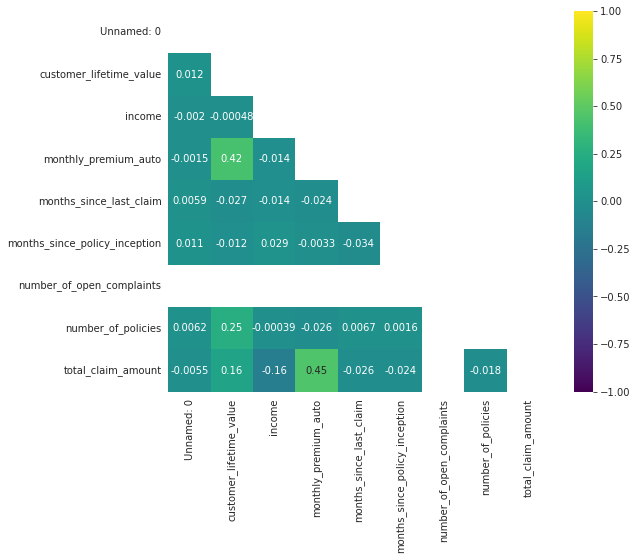

In [12]:
# Check for correlation

corr = numerical_no_out.corr() # parse df to correlation command
mask = np.zeros_like(corr) # mask all zeros 
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"): # hide mirroring part
    f, ax = plt.subplots(figsize=(9, 7)) # define plotsize
    ax = sns.heatmap(corr, mask=mask,cmap= 'viridis', vmin=-1,vmax=1,annot=True, square=True)

## Split x and y - I dont understand the question? I this supposed to be for supervised leaning?


In [13]:
### GLM 

numerical_no_out.columns
#numerical_no_out =numerical_no_out.drop(['Unnamed: 0', 'number_of_open_complaints'],1, inplace=True)



Index(['Unnamed: 0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')

In [97]:
df_nu = numerical_no_out

##Activity 7

##Linear Regression

###Train-test split.
##Standardize the data (after the data split).
##Apply linear regression.
##Model Interpretation.


In [57]:
#cs_df
#cat_dic_cols

array(['region_east', 'region_north west', 'region_west region',
       'response_yes', 'coverage_extended', 'coverage_premium',
       'education_college', 'education_doctor',
       'education_high school or below', 'education_master',
       'effective_to_date_1/10/11', 'effective_to_date_1/11/11',
       'effective_to_date_1/12/11', 'effective_to_date_1/13/11',
       'effective_to_date_1/14/11', 'effective_to_date_1/15/11',
       'effective_to_date_1/16/11', 'effective_to_date_1/17/11',
       'effective_to_date_1/18/11', 'effective_to_date_1/19/11',
       'effective_to_date_1/2/11', 'effective_to_date_1/20/11',
       'effective_to_date_1/21/11', 'effective_to_date_1/22/11',
       'effective_to_date_1/23/11', 'effective_to_date_1/24/11',
       'effective_to_date_1/25/11', 'effective_to_date_1/26/11',
       'effective_to_date_1/27/11', 'effective_to_date_1/28/11',
       'effective_to_date_1/29/11', 'effective_to_date_1/3/11',
       'effective_to_date_1/30/11', 'effective_to

In [99]:
X = pd.concat([df_nu,df_cat], axis=0)



In [100]:
X.head


<bound method NDFrame.head of        customer_lifetime_value   income  monthly_premium_auto  \
1                       2228.0  26794.0                  64.0   
2                      14947.0  22139.0                 100.0   
4                       9025.0  23675.0                 117.0   
5                       4745.0  50549.0                  61.0   
6                       5035.0  37405.0                  63.0   
...                        ...      ...                   ...   
10684                      NaN      NaN                   NaN   
10685                      NaN      NaN                   NaN   
10686                      NaN      NaN                   NaN   
10687                      NaN      NaN                   NaN   
10688                      NaN      NaN                   NaN   

       months_since_last_claim  months_since_policy_inception  \
1                          3.0                           26.0   
2                         34.0                           31

## check distribution of variables in x 

In [107]:
#X.hist(figsize=(12,12))


# Train test split

In [101]:
# Split x and y 

y=X['total_claim_amount']
X=X.drop('total_claim_amount', axis=1)


In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17579 entries, 1 to 10688
Data columns (total 66 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       6890 non-null   float64
 1   customer_lifetime_value          6890 non-null   float64
 2   income                           6890 non-null   float64
 3   monthly_premium_auto             6890 non-null   float64
 4   months_since_last_claim          6890 non-null   float64
 5   months_since_policy_inception    6890 non-null   float64
 6   number_of_open_complaints        6890 non-null   float64
 7   number_of_policies               6890 non-null   float64
 8   effective_to_date                10689 non-null  object 
 9   month                            10689 non-null  object 
 10  region_central                   10689 non-null  float64
 11  region_east                      10689 non-null  float64
 12  region_north west 

In [102]:
# define train and test set 

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [103]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,effective_to_date,month,region_central,region_east,...,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
7122,4723.0,21546.0,119.0,20.0,66.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5587,2767.0,36284.0,74.0,0.0,52.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8374,NaN,NaN,NaN,NaN,NaN,NaN,1/17/11,jan,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
427,NaN,NaN,NaN,NaN,NaN,NaN,2/13/11,feb,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3189,NaN,NaN,NaN,NaN,NaN,NaN,1/6/11,jan,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,NaN,NaN,NaN,NaN,NaN,NaN,2/7/11,feb,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9553,2860.0,50332.0,72.0,2.0,11.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6674,NaN,NaN,NaN,NaN,NaN,NaN,1/27/11,jan,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9027,NaN,NaN,NaN,NaN,NaN,NaN,1/17/11,jan,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
## Standardize the data (Done after split based on distribution before split)

## How do perform different transformations on different variables 

In [104]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

ValueError: could not convert string to float: '1/17/11'

In [106]:
X_test_scaled=std_scaler.transform(X_test)

/opt/anaconda3/envs/DA/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- coverage_basic
- coverage_extended
- coverage_premium
- education_bachelor
- education_college
- ...
Feature names seen at fit time, yet now missing:
- Unnamed: 0
- number_of_open_complaints

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: '1/15/11'

## LN model 

In [105]:
X_train.shape

(13574, 64)

In [23]:
y_train.shape

(4823,)

In [24]:
## On Stockoverflow 
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [25]:
reg.coef_
reg.intercept_

95.65643841015822

In [ ]:
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(reg))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(reg))

In [26]:
## FROM RAFA 

# Check model fit
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     214.3
Date:                Mon, 02 May 2022   Prob (F-statistic):          6.70e-278
Time:                        14:50:08   Log-Likelihood:                -31910.
No. Observations:                4823   AIC:                         6.384e+04
Df Residuals:                    4815   BIC:                         6.389e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        382.9818      2.605    147.013      0.0

In [ ]:
## Interpretation
# R very low. Ony 20% ca be explained -> adjust or drop model
# WHere can I see my critical F? 

#

### Model fit

In [27]:
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(reg))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(reg))


Coefficients: 
 [-1.05981961e-03 -3.08848761e-03 -1.23891373e-03  4.50553332e+00
 -4.12380994e-01 -1.71060876e-01  0.00000000e+00  9.46932806e-01]


NameError: name 'mean_squared_error' is not defined

In [ ]:
## Predict 

In [28]:
y_pred=reg.predict(X_test_scaled)  

y_pred_train=reg.predict(X_train_scaled)

/opt/anaconda3/envs/DA/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/DA/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
X

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
1,1,2228,26794,64,3,26,0,1
2,2,14947,22139,100,34,31,0,2
5,5,4745,50549,61,2,73,0,7
7,7,4956,87197,63,35,45,0,3
8,8,5989,66839,154,33,24,0,1
...,...,...,...,...,...,...,...,...
10674,10674,6232,28334,83,3,44,0,7
10676,10676,9075,37722,116,8,23,0,8
10677,10677,5807,62447,74,9,2,0,7
10680,10680,4547,33531,116,11,15,0,1


In [89]:
#Tasks 

##Model Evaluation:
##MSE.
##RMSE.
##MAE.
##R2.
##Adjusted R2.
##Feature Importance.

/opt/anaconda3/envs/DA/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


TypeError: unsupported format string passed to Series.__format__

## Model Performance 


In [30]:
y_test
y_pred

array([95.39156437, 92.29695213, 94.12280694, ..., 97.53280098,
       97.27966816, 93.38354011])

In [31]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

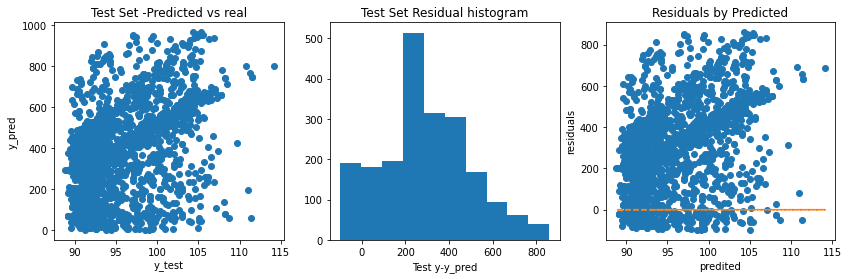

In [32]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

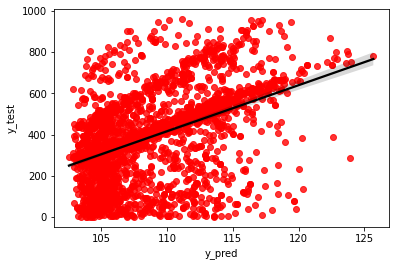

In [38]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

##Error metrics

In [33]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

127618.47106502879
301.42896016803945


In [34]:
##prediction on the train set
mse(y_train,y_pred_train)

124576.27941001003

In [35]:
R2=r2_score(y_test,y_pred)
R2

-1.9884769969381444

In [36]:
R2_test=reg.score(X_test_scaled,y_test)
R2_train=reg.score(X_train_scaled,y_train)

/opt/anaconda3/envs/DA/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/DA/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
X_test.shape[1]

8

In [38]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

-2.000094011503502

In [39]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(reg.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

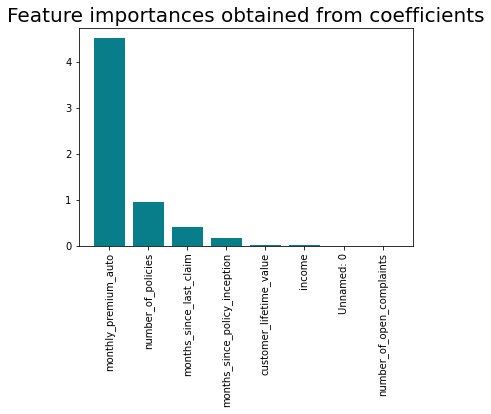

In [40]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()